In [1]:
from ultralytics import YOLO
from paddleocr import PaddleOCR,draw_ocr
from PIL import Image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import easyocr

%matplotlib inline

os.environ['USE_TORCH'] = '1'

# Load model
model = YOLO("./new_models/best.pt")
reader = easyocr.Reader(['en'], gpu=True)
ocr = PaddleOCR(use_angle_cls=True, lang='en') 

[2023/03/09 02:32:27] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\lucki/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\lucki/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

In [2]:
# from PIL
im1 = Image.open(
    r"C:\Users\lucki\Downloads\2nd Training Dataset\Indiana\254311.jpg")

# from list of PIL/ndarray
results = model.predict(source=im1, classes=[1, 3], augment=True)

Ultralytics YOLOv8.0.49  Python-3.7.13 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs

0: 384x640 1 dob, 1 state, 154.2ms
Speed: 0.0ms preprocess, 154.2ms inference, 39.8ms postprocess per image at shape (1, 3, 640, 640)


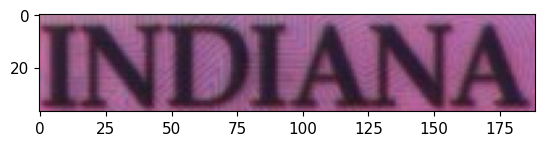

EasyOCR :  ['INDIANA']


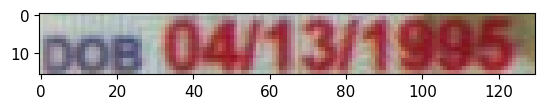

EasyOCR :  ['00b', '04/13/1995']


In [4]:
boxes = results[0].boxes
for box in boxes:

    # crop each box
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    cropped = im1.crop((x1, y1, x2, y2))
    
    plt.imshow(cropped)
    plt.show()

    cropped = cropped.resize((cropped.width*3, cropped.height*3))

    # EasyOCR
    print("EasyOCR : ", reader.readtext(np.array(cropped), detail=0))

    # # # paddleOCR
    # result = ocr.ocr(cropped, cls=True, det=False)
    # for idx in range(len(result)):
    #     res = result[idx]
    #     for line in res:
    #         print(line)

    # print("PaddleOCR : ", result)


In [8]:
result = ocr.ocr(
    r"C:\Users\lucki\Downloads\2nd Training Dataset\Indiana\254311.jpg",
    cls=True)

for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

RuntimeError: (PreconditionNotMet) The third-party dynamic library (cudnn64_7.dll) that Paddle depends on is not configured correctly. (error code is 126)
  Suggestions:
  1. Check if the third-party dynamic library (e.g. CUDA, CUDNN) is installed correctly and its version is matched with paddlepaddle you installed.
  2. Configure third-party dynamic library environment variables as follows:
  - Linux: set LD_LIBRARY_PATH by `export LD_LIBRARY_PATH=...`
  - Windows: set PATH by `set PATH=XXX; (at ..\paddle\phi\backends\dynload\dynamic_loader.cc:305)
